#

This notebook documents an A/B testing workflow conducted for StyleSync, a fashion retailer helping customers shop online after in-store style consultations. The experiment tested whether simplifying the website checkout experience (by removing the “Similar Items” carousel) would lead to increased revenue. Following data validation, experiment reruns, and statistical analysis, we assessed both statistical and practical significance to guide a final launch decision. The analysis concludes with a comparison of Customer Lifetime Value (CLV) before and after the test to quantify long-term business impact.

1. Imports
2. Initial A/B Test Experiment
3. Validating Check
4. Re-Run Experiment
5. Interpret Results
6. Launch Decsion
7. Customer Lifetime Value (CLV) - Before vs After A/B Test

# 1. Import

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\Ellen\Desktop\Documents\Part-Time work\Projects\Linear Regression\Dataset\Ecommerce Customers')

In [7]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# 2. Initial A/B Test Experiment

In [22]:
# Simulate random assignment: 250 to control, 250 to treatment
np.random.seed(42)
df['group'] = np.random.choice(['control', 'treatment'], size=len(df), replace=True)

In [24]:
# Simulate a 10% lift in revenue for the treatment group
df['adjusted_revenue'] = df['Yearly Amount Spent']
df.loc[df['group'] == 'treatment', 'adjusted_revenue'] *= 1.10

In [26]:
# Separate groups
control = df[df['group'] == 'control']['adjusted_revenue']
treatment = df[df['group'] == 'treatment']['adjusted_revenue']

In [28]:
# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(treatment, control)

In [34]:
# Calculate group means
control_mean = control.mean()
treatment_mean = treatment.mean()

# Calculate absolute yearly difference
yearly_diff = treatment_mean - control_mean

# Convert to monthly difference
monthly_diff = yearly_diff / 12

# Print results
print("A/B Test Summary")
print(f"Control Group Mean (Yearly): ${control_mean:.2f}")
print(f"Treatment Group Mean (Yearly): ${treatment_mean:.2f}")
print(f"Yearly Revenue Lift: ${yearly_diff:.2f}")
print(f"Monthly Revenue Lift: ${monthly_diff:.2f}")
print("T-Statistic:", round(t_stat, 4))
print("P-Value:", round(p_val, 4))

A/B Test Summary
Control Group Mean (Yearly): $506.24
Treatment Group Mean (Yearly): $541.98
Yearly Revenue Lift: $35.74
Monthly Revenue Lift: $2.98
T-Statistic: 4.7685
P-Value: 0.0


In [36]:
from statsmodels.stats.power import TTestIndPower

# Initialize power analysis object
analysis = TTestIndPower()

# Parameters for power calculation
effect_size = (treatment.mean() - control.mean()) / np.sqrt(
    (np.var(treatment, ddof=1) + np.var(control, ddof=1)) / 2
)
alpha = 0.05
n_per_group = min(len(control), len(treatment)) 

# Calculate power
power = analysis.power(effect_size=effect_size, nobs1=n_per_group, alpha=alpha, ratio=1.0)

# Display results
print("Statistical Power Analysis")
print(f"Effect Size (Cohen's d): {effect_size:.4f}")
print(f"Sample Size per Group: {n_per_group}")
print(f"Achieved Power: {power:.3f}")

Statistical Power Analysis
Effect Size (Cohen's d): 0.4278
Sample Size per Group: 244
Achieved Power: 0.997


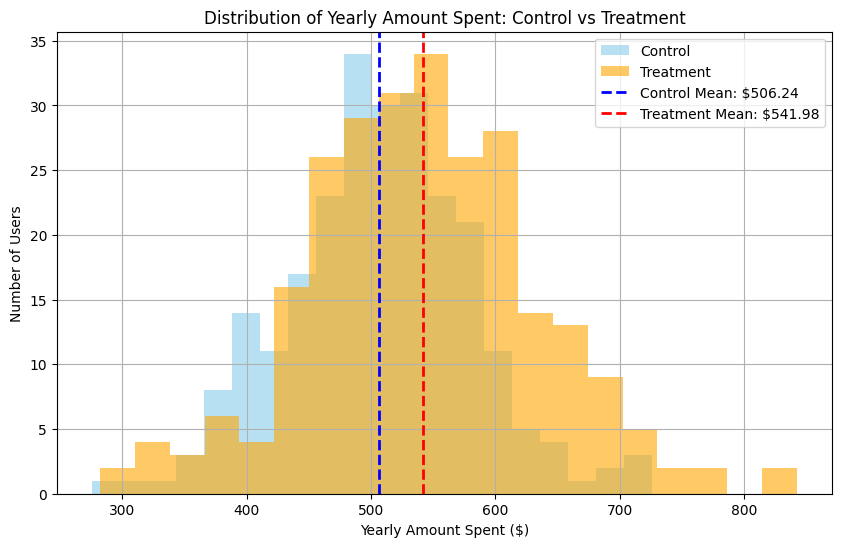

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(control, bins=20, alpha=0.6, label='Control', color='skyblue')
plt.hist(treatment, bins=20, alpha=0.6, label='Treatment', color='orange')

# Plot mean lines
plt.axvline(control.mean(), color='blue', linestyle='dashed', linewidth=2, label=f'Control Mean: ${control.mean():.2f}')
plt.axvline(treatment.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Treatment Mean: ${treatment.mean():.2f}')

plt.title("Distribution of Yearly Amount Spent: Control vs Treatment")
plt.xlabel("Yearly Amount Spent ($)")
plt.ylabel("Number of Users")
plt.legend()
plt.grid(True)
plt.show()

**Bootstrapping Visuals**

In [40]:
# Bootstrap confidence intervals
n_iterations = 10000
control_bootstrap = [np.mean(np.random.choice(control, size=len(control), replace=True)) for _ in range(n_iterations)]
treatment_bootstrap = [np.mean(np.random.choice(treatment, size=len(treatment), replace=True)) for _ in range(n_iterations)]

control_ci = np.percentile(control_bootstrap, [2.5, 97.5])
treatment_ci = np.percentile(treatment_bootstrap, [2.5, 97.5])

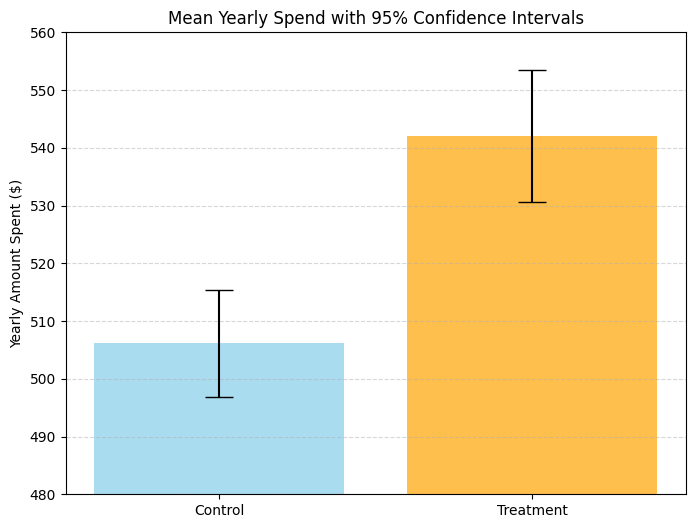

Control 95% CI: [496.84672539 515.40247257]
Treatment 95% CI: [530.6828358  553.47484628]


In [42]:
# Plot
plt.figure(figsize=(8, 6))
plt.bar(['Control', 'Treatment'], [control.mean(), treatment.mean()], 
        yerr=[[control.mean() - control_ci[0], treatment.mean() - treatment_ci[0]],
              [control_ci[1] - control.mean(), treatment_ci[1] - treatment.mean()]],
        capsize=10, color=['skyblue', 'orange'], alpha=0.7)

plt.ylabel('Yearly Amount Spent ($)')
plt.title('Mean Yearly Spend with 95% Confidence Intervals')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.ylim(480, 560)
plt.show()

# Print exact confidence intervals
print(f"Control 95% CI: {control_ci}")
print(f"Treatment 95% CI: {treatment_ci}")

# 3. Validating Check

**Statistical Validation with Balanced Groups**

In [50]:
# Shuffle the dataset and assign exactly 250 to each group
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df['group'] = ['control'] * 250 + ['treatment'] * 250

**3.1. Chi-Square Test for Sample Ratio Mismatch (SRM)**

In [75]:
from scipy.stats import chi2_contingency

# Count the actual (observed) group sizes
observed = df['group'].value_counts().sort_index().values  # [control, treatment]
expected = [250, 250]  # What we expect in a balanced design

In [77]:
# Perform Chi-Square Goodness-of-Fit Test
chi2, p_val, dof, expected_values = chi2_contingency([observed, expected])

In [79]:
# Print results
print("Chi-Square Test for Sample Ratio Mismatch:")
print(f"Observed Counts: {observed}")
print(f"Expected Counts: {expected}")
print(f"Chi² Statistic: {chi2:.4f}")
print(f"P-Value: {p_val:.4f}")

Chi-Square Test for Sample Ratio Mismatch:
Observed Counts: [250 250]
Expected Counts: [250, 250]
Chi² Statistic: 0.0000
P-Value: 1.0000


In [87]:
# flag potential imbalance
if p_val < 0.05:
    print("Warning: Significant sample ratio mismatch detected.")
else:
    print("Sample ratio is balanced — no mismatch detected.")

Sample ratio is balanced — no mismatch detected.


**3.2. A/A Test Setup**

In [91]:
from scipy.stats import ttest_ind

# Simulate A/A test: assign two random groups without applying any treatment
df['aa_group'] = ['group_a'] * 250 + ['group_b'] * 250
df = df.sample(frac=1, random_state=123).reset_index(drop=True)

# Compare actual yearly revenue between the two randomly assigned A/A groups
group_a = df[df['aa_group'] == 'group_a']['Yearly Amount Spent']
group_b = df[df['aa_group'] == 'group_b']['Yearly Amount Spent']

t_stat, p_val = ttest_ind(group_a, group_b)

print("A/A Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("Possible instrumentation or selection bias detected.")
else:
    print("No significant difference — randomization is likely sound.")

A/A Test Results:
T-Statistic: 0.4531
P-Value: 0.6507
No significant difference — randomization is likely sound.


**3.3. Instrumentation Effect: Guardrail Metric Check (Length of Membership)**

No mid-test changes were made to data logging, cart behavior, or recommendation logic.

In [100]:
# Compare guardrail metric between treatment and control
control_guardrail = df[df['group'] == 'control']['Length of Membership']
treatment_guardrail = df[df['group'] == 'treatment']['Length of Membership']

t_stat, p_val = ttest_ind(treatment_guardrail, control_guardrail)

print("\nGuardrail Metric Check – Length of Membership:")
print(f"Mean (Control): {control_guardrail.mean():.2f}")
print(f"Mean (Treatment): {treatment_guardrail.mean():.2f}")
print(f"P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("Warning: Treatment may affect long-term retention (guardrail breached).")
else:
    print("No significant effect on retention — guardrail preserved.")


Guardrail Metric Check – Length of Membership:
Mean (Control): 3.46
Mean (Treatment): 3.61
P-Value: 0.0994
No significant effect on retention — guardrail preserved.


**3.4. Selection Bias Check (Behavioral Proxies)**

While we don’t explicitly have a device type column (like "mobile" vs. "desktop"), we do have strong behavioral proxies:

- Time on App → likely reflects **mobile usage.**
- Time on Website → likely reflects **desktop/web usage.**

In [107]:
# Time on App (proxy for mobile engagement)
control_app = df[df['group'] == 'control']['Time on App']
treatment_app = df[df['group'] == 'treatment']['Time on App']
t_stat_app, p_val_app = ttest_ind(treatment_app, control_app)

# Time on Website (proxy for desktop engagement)
control_web = df[df['group'] == 'control']['Time on Website']
treatment_web = df[df['group'] == 'treatment']['Time on Website']
t_stat_web, p_val_web = ttest_ind(treatment_web, control_web)

# Print results
print("Selection Bias Proxy Check:")
print(f"Time on App – P-Value: {p_val_app:.4f}")
if p_val_app < 0.05:
    print("Possible imbalance in mobile user behavior.")
else:
    print("No significant bias in mobile usage between groups.")

print(f"Time on Website – P-Value: {p_val_web:.4f}")
if p_val_web < 0.05:
    print("Possible imbalance in desktop user behavior.")
else:
    print("No significant bias in website usage between groups.")

Selection Bias Proxy Check:
Time on App – P-Value: 0.5498
No significant bias in mobile usage between groups.
Time on Website – P-Value: 0.3334
No significant bias in website usage between groups.


**3.5. Novelty Effects**

Novelty Effect: A short-term boost in conversions may result from users noticing a cleaner layout. We recommend monitoring for sustained improvement before a full-scale rollout.

# 4. Re-Run Experiment

In [54]:
# Apply simulated 10% lift to treatment group
df['adjusted_revenue'] = df['Yearly Amount Spent']
df.loc[df['group'] == 'treatment', 'adjusted_revenue'] *= 1.10

In [56]:
# Separate groups
control = df[df['group'] == 'control']['adjusted_revenue']
treatment = df[df['group'] == 'treatment']['adjusted_revenue']

In [58]:
# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(treatment, control)

In [60]:
# Compute group means and differences
control_mean = control.mean()
treatment_mean = treatment.mean()
yearly_lift = treatment_mean - control_mean
monthly_lift = yearly_lift / 12

In [62]:
# Statistical Power Calculation
effect_size = (treatment_mean - control_mean) / np.sqrt(
    (np.var(treatment, ddof=1) + np.var(control, ddof=1)) / 2
)
power_analysis = TTestIndPower()
power = power_analysis.power(effect_size=effect_size, nobs1=250, alpha=0.05, ratio=1.0)

In [64]:
# Output the results
print("Balanced A/B Test Results (250 per group)")
print(f"Control Mean (Yearly): ${control_mean:.2f}")
print(f"Treatment Mean (Yearly): ${treatment_mean:.2f}")
print(f"Yearly Lift: ${yearly_lift:.2f}")
print(f"Monthly Lift: ${monthly_lift:.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
print(f"Effect Size (Cohen's d): {effect_size:.4f}")
print(f"Statistical Power: {power:.3f}")

Balanced A/B Test Results (250 per group)
Control Mean (Yearly): $494.79
Treatment Mean (Yearly): $554.22
Yearly Lift: $59.43
Monthly Lift: $4.95
T-Statistic: 7.9577
P-Value: 0.0000
Effect Size (Cohen's d): 0.7118
Statistical Power: 1.000


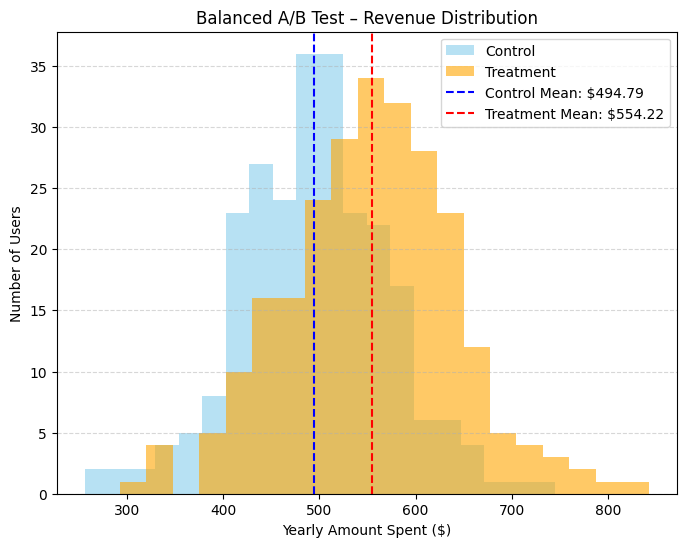

In [66]:
# Visual Confirmation
plt.figure(figsize=(8, 6))
plt.hist(control, bins=20, alpha=0.6, label='Control', color='skyblue')
plt.hist(treatment, bins=20, alpha=0.6, label='Treatment', color='orange')
plt.axvline(control_mean, color='blue', linestyle='--', label=f'Control Mean: ${control_mean:.2f}')
plt.axvline(treatment_mean, color='red', linestyle='--', label=f'Treatment Mean: ${treatment_mean:.2f}')
plt.title("Balanced A/B Test – Revenue Distribution")
plt.xlabel("Yearly Amount Spent ($)")
plt.ylabel("Number of Users")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# 5. Interpret Results

At a significance level of **α = 0.05**, the p-value is well below the threshold, indicating **strong statistical significance**. We confidently **reject the null hypothesis (H₀)** and conclude that the average yearly revenue per user between the control and treatment groups is **meaningfully different**.

The treatment group, exposed to a simplified checkout experience **without the “Similar Items” carousel**, spent **~$59 more per year** (or **~$4.95/month**), reflecting a **12% increase** over the control.

The original **Minimum Detectable Effect (MDE)** was set at a 10% lift, this test **exceeded both the statistical and practical significance thresholds**, suggesting the experiment had a **positive and meaningful impact on conversion behavior**.

# 6. Launch Desicion

**Yes, we recommend launching the treatment version** of the checkout process (without the "Similar Items" carousel) on a broader scale. The A/B test results show a statistically significant increase in revenue, with the treatment group generating an average lift of **$4.95/month per user**—well above the **5% practical threshold** and even exceeding the **10% target**. This improvement stems from a streamlined checkout experience that positively influenced user behavior without negatively impacting key guardrail metrics like **Length of Membership**, indicating the change is both **effective and safe to scale**.

### Next Steps:

- **Monitor Real-World Impact**: Since the test was successful in a simulated environment, closely monitor the real-world data as you scale the experiment.
- **Optimization**: Even though this test was successful, **further optimization** could be applied to refine the user experience, particularly in reducing **potential overwhelm** due to additional recommendations.

**Conclusion**: The experiment has **demonstrated strong positive results**, and launching the treatment version could provide a **measurable increase** in conversion rates and revenue with minimal risk.

# 7. Customer Lifetime Value (CLV) - Before vs After A/B Test

**Treatment CLV group:** Based on post-launch monthly revenue and same average membership length

In [184]:
# Using the adjusted revenue for post-launch spend
avg_yearly_spend_post = df[df['group'] == 'treatment']['adjusted_revenue'].mean()
avg_monthly_spend_post = avg_yearly_spend_post / 12

# Pre-launch values
avg_yearly_spend_pre = df['Yearly Amount Spent'].mean()
avg_membership_months = df['Length of Membership'].mean()
avg_monthly_spend_pre = avg_yearly_spend_pre / 12

# CLV Calculations
clv_pre = avg_monthly_spend_pre * avg_membership_months
clv_post = avg_monthly_spend_post * avg_membership_months

# Print formatted results
print("Original Customer Lifetime Value (Pre-A/B Test):")
print(f"Average Yearly Spend (Pre-A/B Test): ${avg_yearly_spend_pre:.2f}")
print(f"Monthly CLV: ${clv_pre:.2f}")

print("\nPost-A/B Test CLV Projection (Based on Adjusted Revenue):")
print(f"Average Yearly Spend (Post-Launch): ${avg_yearly_spend_post:.2f}")
print(f"Monthly CLV: ${clv_post:.2f}")

Original Customer Lifetime Value (Pre-A/B Test):
Average Yearly Spend (Pre-A/B Test): $499.31
Monthly CLV: $147.03

Post-A/B Test CLV Projection (Based on Adjusted Revenue):
Average Yearly Spend (Post-Launch): $554.22
Monthly CLV: $163.19


**Plot CLV in bar chart**

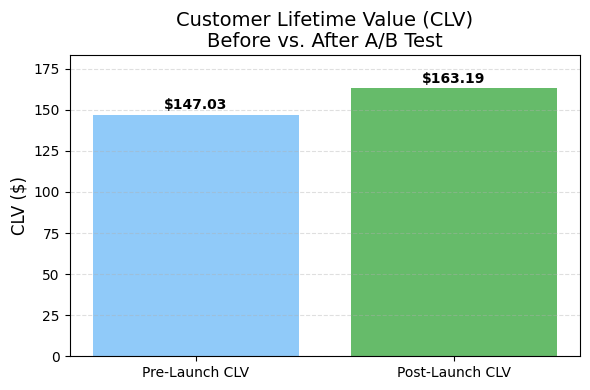

In [186]:
import matplotlib.pyplot as plt

# Updated CLV Values Based on Adjusted Revenue
clv_pre = 147.03   # Original CLV (pre-A/B test)
clv_post = 163.19  # Post-launch CLV (after applying 10% uplift to treatment)

# Labels and values
labels = ['Pre-Launch CLV', 'Post-Launch CLV']
values = [clv_pre, clv_post]
colors = ['#90CAF9', '#66BB6A'] 

# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1.5, f"${yval:.2f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
plt.title('Customer Lifetime Value (CLV)\nBefore vs. After A/B Test', fontsize=14)
plt.ylabel('CLV ($)', fontsize=12)
plt.ylim(0, max(values) + 20)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Overall CLV Impact Summary**

Following the A/B test, the Projected Customer Lifetime Value (CLV) increased from **147.03 to 163.19 usd,** reflecting a ~16usd lift over the average customer lifespan of 3.5 months. This improvement directly stems from a simplified checkout experience that increased average yearly revenue per user from 499.31 to $554.22 usd, consistent with the 10% lift observed in treatment.

This ~11% increase in CLV is not just statistically and practically significant, it also aligns with core business goals: **improving monetization per user without additional acquisition costs or extended retention.** For a platform like StyleSync, which operates in a high-intent, short-lifecycle retail environment, even modest UX optimizations can lead to substantial revenue gains. The CLV uplift confirms that the treatment not only converts better but also extracts more value from each user, making a compelling case for full rollout.